In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
#creating path to source file
path = r'C:\Users\nikman\Desktop\CareerFoundry Project\Achievement 4\02-2024 Instacart Basket Analysis'

In [3]:
#import
#importing lated merged dataframe
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_customer_final.pkl'))

In [6]:
df.head()

key_column user_id  order_number  order_days_of_the_week  order_hour_of_day  \
0     180919      52            19                       3                  8   
1     180919      52            19                       3                  8   
2     180919      52            19                       3                  8   
3     180919      52            19                       3                  8   
4     180919      52            19                       3                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     8.0         196                  4          1   
1                     8.0       41787                  8          1   
2                     8.0       46149                  3          1   
3                     8.0       38928                  5          1   
4                     8.0       10441                  2          1   

               product_name  ...  median_days_since_prior_order  \
0                      Soda  ...                            8.0   
1            Bartlett Pears  ...                            8.0   
2         Zero Calorie Cola  ...                            8.0   
3  0% Greek Strained Yogurt  ...                            8.0   
4       Dry Roasted Almonds  ...                            8.0   

      frequency_flag  First Name Last_Name     STATE Age Number_of_dependants  \
0  Frequent customer  Jacqueline     Roach  Nebraska  21                    3   
1  Frequent customer  Jacqueline     Roach  Nebraska  21                    3   
2  Frequent customer  Jacqueline     Roach  Nebraska  21                    3   
3  Frequent customer  Jacqueline     Roach  Nebraska  21                    3   
4  Frequent customer  Jacqueline     Roach  Nebraska  21                    3   

                      Family_Status income  _merge  
0  living with parents and siblings  56831    both  
1  living with parents and siblings  56831    both  
2  living with parents and siblings  56831    both  
3  living with parents and siblings  56831    both  
4  living with parents and siblings  56831    both  

[5 rows x 31 columns]

In [7]:
df.columns

Index(['key_column', 'user_id', 'order_number', 'order_days_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest_days', 'busiest_period_of_day', 'max_order_no', 'Loyalty_flag',
       'avg_price_orders', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'First Name', 'Last_Name', 'STATE', 'Age',
       'Number_of_dependants', 'Family_Status', 'income', '_merge'],
      dtype='object')

In [8]:
df['price_range_loc']

0          Medium-range product
1                           nan
2          Medium-range product
3          Medium-range product
4             Low-range product
                   ...         
1955162       Low-range product
1955163    Medium-range product
1955164    Medium-range product
1955165    Medium-range product
1955166    Medium-range product
Name: price_range_loc, Length: 1955167, dtype: object

In [18]:
#Create new column called Regions
df.loc[df['STATE'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York',
'Pennsylvania','New Jersey']), 'Region'] = 'Northeast'

In [19]:
#Create new column called Regions
df.loc[df['STATE'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']), 'Region'] = 'Midwest'

In [20]:
#Create new column called Regions
df.loc[df['STATE'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']), 'Region'] = 'South'

In [22]:
#Create new column called Regions
# Create new column called Regions
df.loc[df['STATE'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']), 'Region'] = 'West'


In [23]:
df['Region'].value_counts(dropna=False)

Region
South        652456
West         498836
Midwest      461008
Northeast    342867
Name: count, dtype: int64

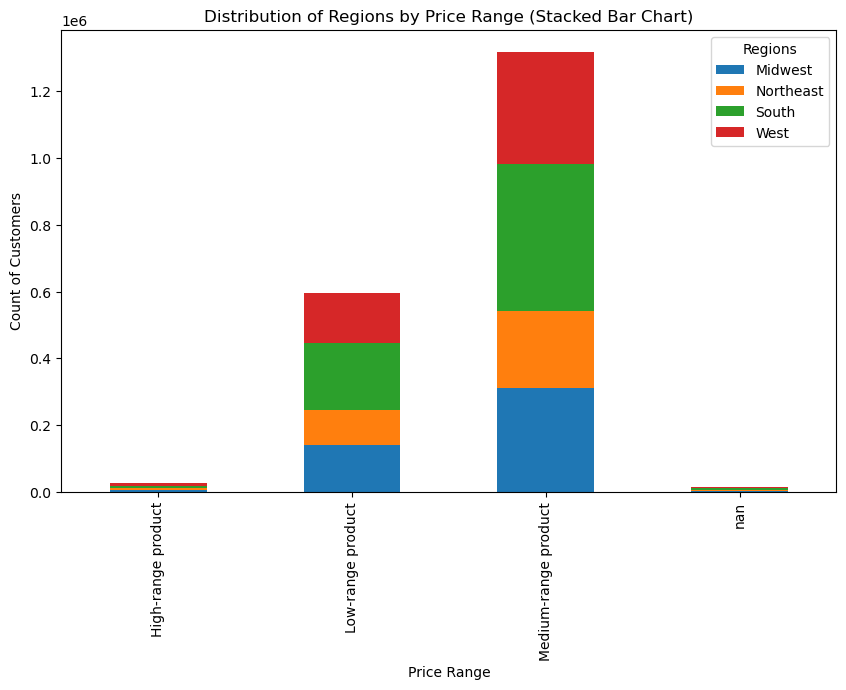

In [26]:


# Group by price_range_loc and Loyalty_flag and count the occurrences
grouped = df.groupby(['price_range_loc', 'Region']).size().unstack()

# Plot the stacked bar chart
stacked_loyal= grouped.plot(kind='bar', stacked=True, figsize=(10, 6),color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

plt.xlabel('Price Range')
plt.ylabel('Count of Customers')
plt.title('Distribution of Regions by Price Range (Stacked Bar Chart)')
plt.legend(title='Regions')

# Save the visualization to a file
plt.savefig('Regions_by_price_range.png', bbox_inches='tight')  # Change the filename and extension as needed

plt.show()




In [27]:
df['Family_Status']

0          living with parents and siblings
1          living with parents and siblings
2          living with parents and siblings
3          living with parents and siblings
4          living with parents and siblings
                         ...               
1955162                    divorced/widowed
1955163                             married
1955164                             married
1955165                              single
1955166                             married
Name: Family_Status, Length: 1955167, dtype: object

In [28]:
df['Age']

0          21
1          21
2          21
3          21
4          21
           ..
1955162    81
1955163    34
1955164    55
1955165    48
1955166    45
Name: Age, Length: 1955167, dtype: int64

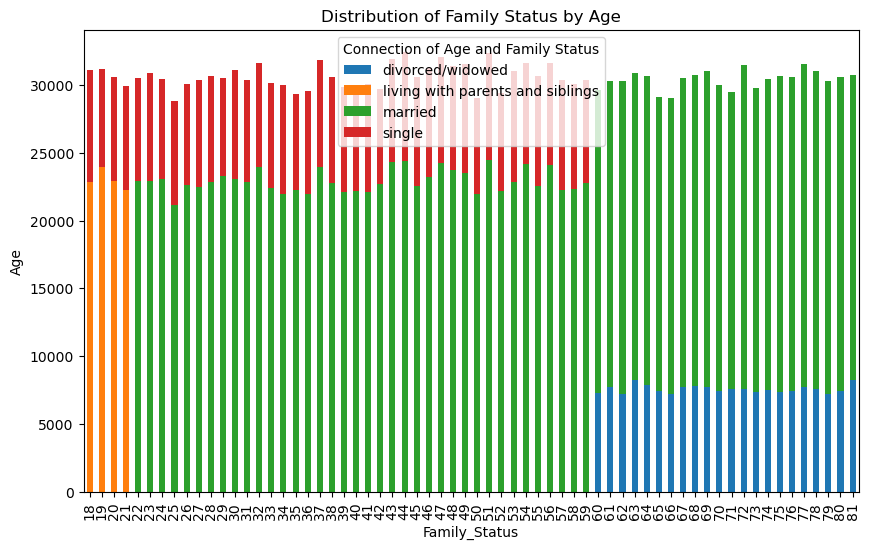

In [36]:
# Group by price_range_loc and Loyalty_flag and count the occurrences
grouped = df.groupby(['Age', 'Family_Status']).size().unstack()

# Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Family_Status')
plt.ylabel('Age')
plt.title('Distribution of Family Status by Age')
plt.legend(title='Connection of Age and Family Status')
plt.savefig('Family Status by Age 2', bbox_inches='tight')
plt.show()

C:\Users\nikman\AppData\Local\Temp\ipykernel_21104\3323231257.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Age_Group', 'Family_Status']).size().unstack()


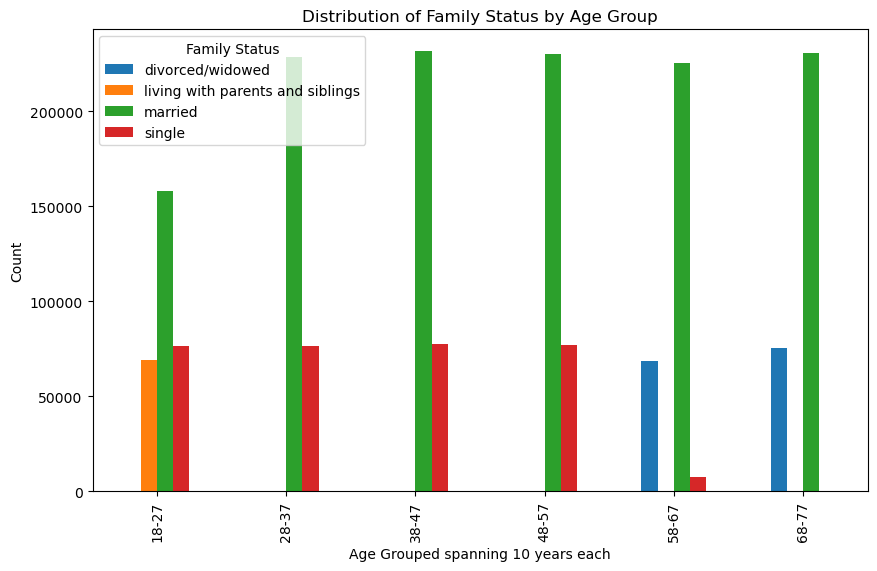

In [35]:
# Define age groups spanning 10 years each
age_groups = np.arange(18, 88, 10)  # Assuming the maximum age is 100

# Create a new column in the DataFrame indicating the age group for each age
df['Age_Group'] = pd.cut(df['Age'], bins=age_groups, labels=[f'{i}-{i+9}' for i in age_groups[:-1]])

# Group by age group and Family_Status and count the occurrences
grouped = df.groupby(['Age_Group', 'Family_Status']).size().unstack()

# Plot the stacked bar chart
grouped.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Age Grouped spanning 10 years each')
plt.ylabel('Count')
plt.title('Distribution of Family Status by Age Group')
plt.legend(title='Family Status')
plt.savefig('Family Status by Age 1', bbox_inches='tight')
plt.show()

In [34]:
married family status: 22 years to 81 years
living with parents 18- 21 years
single 18 to 59 years
divorced/widowed is from 60 to 81 years
max customers fall under the married bracket

SyntaxError: invalid syntax (2259404625.py, line 1)